In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# df = pd.read_csv('yahoo_finance_articles.csv',usecols=['content'])
df = pd.read_csv('/content/drive/MyDrive/yahoo_finance_articles.csv', usecols=['content'])

df.head()
df_0 = df.copy()

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s.]', '', text)
    text = ' '.join(text.split())
    return text

def tokenize_text(text):
    if pd.isna(text):
        return []
    clean_text = preprocess_text(text)
    tokens = word_tokenize(clean_text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens
             if token not in stop_words
             and token not in string.punctuation]
    return tokens

df['content_tokens'] = df['content'].apply(lambda x: tokenize_text(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,content_tokens
0,In This Article: The Nasdaq led US stocks high...,"[article, nasdaq, led, us, stocks, higher, wed..."
1,In This Article: Netflix stock (NFLX) surged t...,"[article, netflix, stock, nflx, surged, alltim..."
2,In This Article: Nvidia (NVDA) stock jumped mo...,"[article, nvidia, nvda, stock, jumped, 4, wedn..."
3,In This Article: JPMorgan Chase (JPM) CEO Jami...,"[article, jpmorgan, chase, jpm, ceo, jamie, di..."
4,In This Article: By Stephen Nellis and Krystal...,"[article, stephen, nellis, krystal, hu, reuter..."


In [5]:
# !pip install -U spacy
# !pip install -U spacy-transformers
!python -m spacy download en_core_web_trf

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_trf-3.7.3/en_core_web_trf-3.7.3-py3-none-any.whl (457.4 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import spacy
nlp = spacy.load("en_core_web_trf")
text = "Tesla stock rises after strong earnings report. Elon Musk continues to lead the firm."
doc = nlp(text)
print("Extracted Named Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

/usr/local/lib/python3.11/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev

Extracted Named Entities:
Tesla: ORG
Elon Musk: PERSON


In [7]:
df['content_tokens_st'] = df['content_tokens'].apply(lambda x: ' '.join(x))
df['content_tokens_st']

,content_tokens_st
0,article nasdaq led us stocks higher wednesday ...
1,article netflix stock nflx surged alltime high...
2,article nvidia nvda stock jumped 4 wednesday e...
3,article jpmorgan chase jpm ceo jamie dimon wed...
4,article stephen nellis krystal hu reuters micr...
5,article bloomberg investors willing go market ...
6,article johnson johnson jnj beat fourth quarte...
7,bloomberg jpmorgan chase co.s dealmakers spend...
8,article hindenburg research widely recognized ...
9,bloomberg venture global inc. slashed marketed...


In [8]:
# def extract_entities(text):
#     doc = nlp(text)
#     entities = []
#     for ent in doc.ents:
#         entities.append((ent.text, ent.label_))
#     return entities

# df['entities'] = df['content'].apply(lambda x: extract_entities(x))

import spacy

nlp = spacy.load("en_core_web_trf")

def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.start_char, ent.end_char, ent.label_))
    return entities

df['entities'] = df['content'].apply(lambda x: extract_entities(x))

df['content_tokens_st_entities'] = df['content_tokens_st'].apply(lambda x: extract_entities(x))

display(df['entities'])
display(df['content_tokens_st_entities'])


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.11/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode un

,entities
0,"[(21, 27, ORG), (32, 34, GPE), (52, 61, DATE),..."
1,"[(17, 24, ORG), (32, 36, ORG), (71, 87, PERCEN..."
2,"[(17, 23, ORG), (25, 29, ORG), (44, 56, PERCEN..."
3,"[(17, 31, ORG), (33, 36, ORG), (42, 53, PERSON..."
4,"[(20, 34, PERSON), (39, 49, PERSON), (51, 58, ..."
5,"[(18, 27, ORG), (78, 95, DATE), (120, 122, GPE..."
6,"[(17, 34, ORG), (36, 39, ORG), (49, 63, DATE),..."
7,"[(1, 10, ORG), (15, 37, ORG), (76, 90, LOC), (..."
8,"[(17, 36, ORG), (149, 158, DATE), (328, 341, P..."
9,"[(1, 10, ORG), (15, 34, ORG), (143, 155, MONEY..."


,content_tokens_st_entities
0,"[(8, 14, ORG), (19, 21, GPE), (36, 45, DATE), ..."
1,"[(8, 15, ORG), (60, 64, CARDINAL), (79, 88, DA..."
2,"[(8, 14, ORG), (33, 34, CARDINAL), (35, 44, DA..."
3,"[(31, 42, PERSON), (43, 52, DATE), (85, 90, PE..."
4,"[(8, 22, PERSON), (23, 30, PERSON), (42, 56, O..."
5,"[(8, 17, PERSON), (46, 59, DATE), (77, 79, GPE..."
6,"[(8, 27, ORG), (33, 47, DATE), (48, 61, DATE),..."
7,"[(0, 18, ORG), (55, 60, NORP), (61, 65, GPE), ..."
8,"[(8, 27, ORG), (111, 120, DATE), (189, 192, CA..."
9,"[(0, 29, ORG), (111, 122, CARDINAL), (135, 144..."


In [9]:
pd.set_option('display.max_colwidth', None)
df.content_tokens_st_entities

,content_tokens_st_entities
0,"[(8, 14, ORG), (19, 21, GPE), (36, 45, DATE), (46, 58, ORG), (79, 92, PERSON), (151, 153, GPE), (191, 194, CARDINAL), (234, 244, ORG), (262, 265, CARDINAL), (340, 343, CARDINAL), (356, 359, CARDINAL), (375, 382, DATE), (505, 507, GPE), (518, 529, CARDINAL), (601, 611, ORG), (619, 630, ORG), (639, 655, ORG), (671, 680, CARDINAL), (709, 723, ORG), (731, 736, ORG), (750, 752, CARDINAL), (764, 776, ORG), (790, 792, CARDINAL), (807, 815, ORG), (968, 975, DATE), (1012, 1014, CARDINAL), (1020, 1025, GPE), (1034, 1040, DATE), (1073, 1075, GPE), (1091, 1098, DATE), (1111, 1116, GPE), (1139, 1144, ORDINAL), (1178, 1191, GPE), (1199, 1204, GPE), (1210, 1219, DATE), (1236, 1252, ORG), (1287, 1296, ORG), (1297, 1316, ORG), (1324, 1333, DATE), (1417, 1424, ORG), (1432, 1434, ORG), (1468, 1474, ORG), (1499, 1505, ORG), (1516, 1524, CARDINAL), (1549, 1558, DATE), (1563, 1566, CARDINAL), (1606, 1617, ORG), (1618, 1623, CARDINAL), (1662, 1665, CARDINAL), (1666, 1680, ORG), (1688, 1696, CARDINAL), (1697, 1708, ORG), (1716, 1724, CARDINAL), (1726, 1731, PERSON), (1739, 1749, ORG), (1760, 1772, PERSON), (1787, 1798, MONEY), (1886, 1888, GPE), (1917, 1923, PERSON), (1924, 1932, NORP), (1946, 1961, ORG), (2011, 2023, ORG), (2038, 2047, DATE), (2064, 2072, DATE), (2082, 2090, ORG), (2091, 2096, ORDINAL), (2111, 2129, ORG), (2217, 2228, ORG), (2229, 2249, ORG), (2257, 2266, DATE), (2338, 2339, CARDINAL), (2394, 2396, GPE), (2440, 2452, DATE), (2453, 2460, ORG), (2480, 2488, PERSON), (2508, 2515, DATE), (2516, 2521, TIME), (2553, 2558, PERSON), (2593, 2595, GPE), (2596, 2601, GPE), (2669, 2674, GPE), (2736, 2745, DATE), (2746, 2753, ORG), (2799, 2812, ORG), (2847, 2849, CARDINAL), (2871, 2880, DATE), (2881, 2892, ORG), (2910, 2934, ORG), (2935, 2949, DATE), (3001, 3005, CARDINAL), (3062, 3078, ORG), (3092, 3096, CARDINAL), (3103, 3107, CARDINAL), (3157, 3169, CARDINAL), (3176, 3190, DATE), (3247, 3256, DATE), (3273, 3281, ORG), (3290, 3297, ORG), (3313, 3323, CARDINAL), (3346, 3354, DATE), ...]"
1,"[(8, 15, ORG), (60, 64, CARDINAL), (79, 88, DATE), (89, 100, ORG), (118, 126, ORG), (127, 141, DATE), (193, 197, CARDINAL), (284, 288, CARDINAL), (295, 299, CARDINAL), (349, 361, CARDINAL), (368, 382, DATE), (439, 448, DATE), (465, 473, ORG), (482, 484, DATE), (507, 516, ORG), (525, 537, PERSON), (565, 572, ORG), (588, 598, CARDINAL), (621, 629, DATE), (664, 671, DATE), (672, 679, ORG), (689, 693, DATE), (702, 714, CARDINAL), (715, 727, CARDINAL), (740, 761, CARDINAL), (797, 805, ORG), (812, 816, DATE), (853, 862, PERSON), (867, 877, PERSON), (898, 908, ORG), (991, 1004, ORG), (1035, 1039, CARDINAL), (1046, 1050, CARDINAL), (1073, 1084, CARDINAL), (1107, 1114, CARDINAL), (1148, 1152, CARDINAL), (1162, 1163, CARDINAL), (1165, 1176, ORG), (1209, 1221, CARDINAL), (1242, 1255, CARDINAL), (1272, 1276, DATE), (1296, 1307, DATE), (1342, 1346, DATE), (1388, 1396, ORG), (1466, 1475, ORG), (1484, 1494, PERSON), (1500, 1509, DATE), (1555, 1559, DATE), (1587, 1591, DATE), (1649, 1653, DATE), (1655, 1663, ORG), (1695, 1702, ORG), (1709, 1720, PERSON), (1761, 1764, CARDINAL), (1923, 1929, PERSON), (2034, 2048, ORG), (2049, 2060, PERSON), (2141, 2146, PERSON), (2150, 2154, PERSON), (2161, 2164, ORG), (2210, 2218, DATE), (2229, 2233, PERSON), (2234, 2239, PERSON), (2256, 2267, CARDINAL), (2333, 2337, DATE), (2338, 2348, EVENT), (2361, 2372, ORG), (2395, 2406, CARDINAL), (2407, 2409, GPE), (2428, 2431, ORG), (2483, 2490, ORG), (2503, 2521, DATE), (2522, 2524, GPE), (2620, 2623, ORG), (2636, 2643, ORG), (2752, 2760, PERSON), (2799, 2815, MONEY), (2824, 2833, ORG), (2854, 2867, CARDINAL), (2885, 2887, CARDINAL), (2904, 2913, DATE), (2914, 2921, ORG), (2929, 2942, DATE), (2951, 2964, CARDINAL), (2999, 3012, CARDINAL), (3064, 3071, DATE), (3094, 3098, CARDINAL), (3122, 3126, CARDINAL), (3138, 3142, CARDINAL), (3163, 3177, DATE), (3178, 3185, ORG), (3193, 3207, DATE), (3212, 3216, CARDINAL), (3233, 3237, CARDINAL), (3304, 3308, CARDINAL), (3309, 332

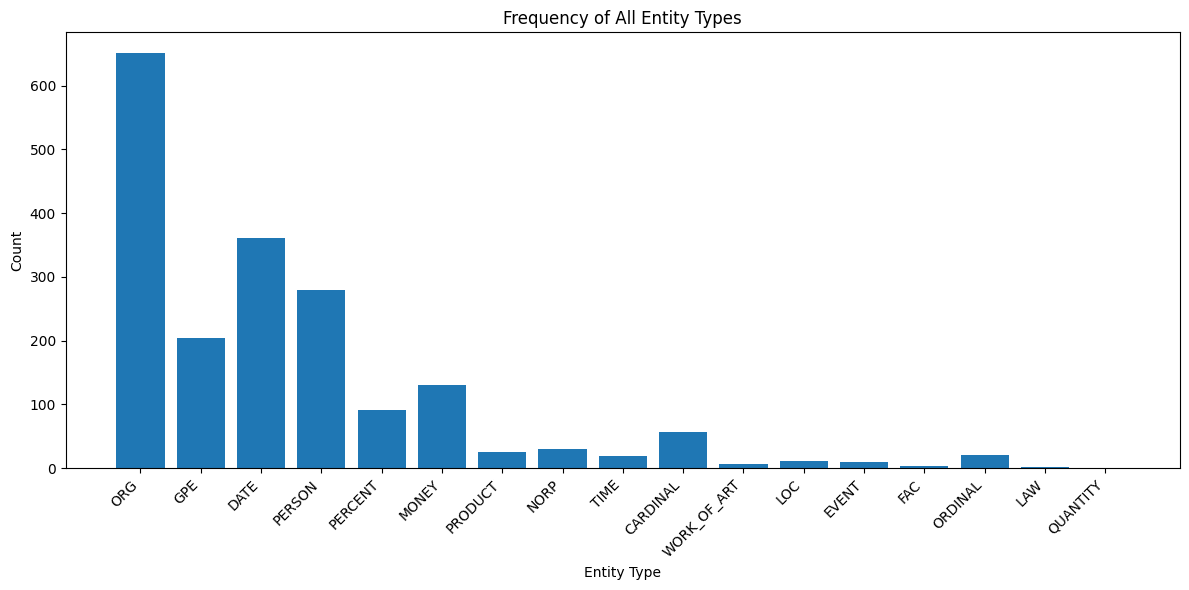

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

all_entities = [entity for entities in df['entities'] for entity in entities]
entity_counts = Counter(entity[2] for entity in all_entities)

plt.figure(figsize=(12, 6))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Frequency of All Entity Types")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
entities_label_df = df['entities']
entities_label_df

entities_label_df.to_csv('entities_label_df.csv', index=False)

In [12]:
df['entities']


,entities
0,"[(21, 27, ORG), (32, 34, GPE), (52, 61, DATE), (65, 72, ORG), (74, 78, ORG), (112, 126, PERSON), (197, 199, GPE), (245, 259, PERCENT), (308, 315, ORG), (351, 355, PERCENT), (454, 458, PERCENT), (510, 517, DATE), (534, 539, PERSON), (699, 701, GPE), (722, 734, MONEY), (785, 790, PERSON), (850, 856, ORG), (858, 862, ORG), (883, 891, ORG), (924, 934, PERCENT), (977, 982, GPE), (984, 992, ORG), (1002, 1007, ORG), (1022, 1025, PERCENT), (1038, 1045, ORG), (1047, 1051, ORG), (1066, 1079, PERCENT), (1251, 1256, PERSON), (1295, 1302, DATE), (1349, 1352, PERCENT), (1361, 1366, GPE), (1378, 1384, DATE), (1409, 1411, GPE), (1437, 1439, GPE), (1458, 1465, DATE), (1483, 1488, GPE), (1508, 1513, PERSON), (1566, 1572, GPE), (1577, 1583, GPE), (1595, 1600, GPE), (1609, 1618, DATE), (1732, 1749, ORG), (1751, 1754, ORG), (1763, 1772, DATE), (1891, 1907, ORG), (1909, 1911, ORG), (1957, 1963, ORG), (1993, 1999, ORG), (2001, 2005, ORG), (2012, 2021, PERCENT), (2051, 2060, DATE), (2068, 2082, MONEY), (2196, 2200, ORG), (2202, 2206, ORG), (2213, 2227, PERCENT), (2235, 2244, ORG), (2246, 2250, ORG), (2259, 2268, PERCENT), (2274, 2280, ORG), (2282, 2286, ORG), (2295, 2304, PERCENT), (2306, 2311, PERSON), (2343, 2355, PERSON), (2372, 2384, MONEY), (2419, 2427, PRODUCT), (2484, 2486, GPE), (2492, 2498, ORG), (2500, 2504, ORG), (2507, 2514, ORG), (2523, 2529, ORG), (2535, 2543, NORP), (2557, 2565, ORG), (2567, 2573, ORG), (2642, 2648, ORG), (2658, 2670, PERCENT), (2689, 2698, DATE), (2721, 2728, DATE), (2745, 2748, ORG), (2926, 2932, ORG), (2934, 2938, ORG), (2944, 2964, ORG), (2966, 2970, ORG), (2980, 2992, PERCENT), (2996, 3005, DATE), (3054, 3074, ORG), (3100, 3102, PERCENT), (3191, 3193, GPE), (3256, 3272, DATE), (3275, 3293, ORG), (3302, 3310, PERSON), (3341, 3348, DATE), (3349, 3354, TIME), (3404, 3409, PERSON), (3459, 3461, GPE), (3471, 3476, GPE), (3568, 3573, GPE), (3576, 3580, PERSON), (3666, 3675, DATE), (3677, 3684, ORG), (3737, 3744, ORG), ...]"
1,"[(17, 24, ORG), (32, 36, ORG), (71, 87, PERCENT), (108, 117, DATE), (165, 179, DATE), (198, 228, TIME), (250, 267, MONEY), (339, 355, ORG), (379, 384, MONEY), (397, 402, MONEY), (472, 484, CARDINAL), (494, 512, DATE), (591, 600, DATE), (644, 646, DATE), (676, 685, ORG), (694, 706, PERSON), (773, 784, MONEY), (815, 824, DATE), (870, 877, DATE), (879, 886, ORG), (900, 904, DATE), (913, 952, MONEY), (973, 999, MONEY), (1062, 1066, DATE), (1072, 1075, CARDINAL), (1089, 1092, ORG), (1114, 1123, PERSON), (1128, 1138, PERSON), (1173, 1183, WORK_OF_ART), (1379, 1383, MONEY), (1400, 1404, MONEY), (1446, 1451, MONEY), (1462, 1467, MONEY), (1510, 1511, MONEY), (1516, 1521, MONEY), (1575, 1579, MONEY), (1597, 1598, MONEY), (1655, 1672, CARDINAL), (1702, 1715, CARDINAL), (1732, 1739, DATE), (1763, 1774, DATE), (1813, 1835, DATE), (1899, 1906, ORG), (1997, 2006, ORG), (2015, 2025, PERSON), (2034, 2043, DATE), (2097, 2101, DATE), (2148, 2152, DATE), (2229, 2233, DATE), (2235, 2242, ORG), (2284, 2291, ORG), (2299, 2310, PERSON), (2362, 2365, CARDINAL), (2553, 2559, PERSON), (2635, 2646, DATE), (2705, 2720, ORG), (2721, 2732, PERSON), (2801, 2803, DATE), (2854, 2859, PERSON), (2863, 2867, PERSON), (2879, 2882, ORG), (2972, 2980, DATE), (2986, 2995, PERSON), (3000, 3010, PERSON), (3132, 3136, DATE), (3137, 3147, EVENT), (3176, 3184, NORP), (3214, 3225, CARDINAL), (3226, 3228, GPE), (3253, 3256, ORG), (3312, 3319, ORG), (3345, 3358, DATE), (3371, 3373, GPE), (3451, 3454, ORG), (3455, 3458, PRODUCT), (3510, 3513, ORG), (3527, 3534, ORG), (3604, 3618, DATE), (3738, 3752, MONEY), (3756, 3758, DATE), (3768, 3777, ORG), (3802, 3816, MONEY), (3844, 3847, PERCENT), (3860, 3885, DATE), (3887, 3894, ORG), (3905, 3918, DATE), (3930, 3944, MONEY), (3988, 4002, MONEY), (4060, 4071, DATE), (4108, 4112, MONEY), (4147, 4151, MONEY), (4175, 4179, MONEY), (4206, 4225, DATE), (4227, 4234, ORG), (4245, 4259, DATE), (4268, 4272, MONEY), (4301, 4305, MONEY), (4390, 4395, PERCENT), (4399, 4417, DATE), (4422, 4425, PERCENT), 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['annotations'] = df['entities'].apply(lambda entities: {"entities": entities})

In [14]:
new_df = df[['content', 'annotations']].copy()

In [15]:
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [17]:
nlp = spacy.load("ner_model")
for _, row in test_df.iterrows():
    text = row["content"]
    doc = nlp(text)
    print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])

Entities: [('Nasdaq', 'ORG'), ('US', 'GPE'), ('Wednesday', 'DATE'), ('Netflix', 'ORG'), ('NFLX', 'ORG'), ('Donald Trump', 'ORG'), ('US', 'GPE'), ('Nasdaq Composite', 'ORG'), ('Netflix', 'ORG'), ('0.6', 'ORG'), ('Dow Jones', 'PERSON'), ('^DJI', 'ORG'), ('0.3', 'ORG'), ('Tuesday', 'ORG'), ('Trump', 'ORG'), ('US', 'GPE'), ('Biden', 'ORG'), ('Oracle', 'ORG'), ('ORCL', 'ORG'), ('Stargate', 'ORG'), ('Tokyo', 'ORG'), ('SoftBank', 'ORG'), ('9984.T', 'ORG'), ('SFTBY', 'ORG'), ('11', 'ORG'), ('Netflix', 'ORG'), ('NFLX', 'ORG'), ('Trump', 'ORG'), ('Tuesday', 'ORG'), ('China', 'GPE'), ('US', 'GPE'), ('Tuesday', 'ORG'), ('China', 'GPE'), ('Trump', 'GPE'), ('Mexico', 'ORG'), ('Canada', 'GPE'), ('Stocks', 'ORG'), ('China', 'GPE'), ('Wednesday', 'DATE'), ('Corporate', 'ORG'), ('Before', 'ORG'), ('Johnson &', 'ORG'), ('JNJ', 'ORG'), ('Procter &', 'PERSON'), ('Amazon', 'ORG'), ('Amazon', 'ORG'), ('AMZN', 'ORG'), ('2', 'ORG'), ('Wednesday', 'DATE'), ('Other', 'ORG'), ('Meta', 'ORG'), ('META', 'ORG'), ('1